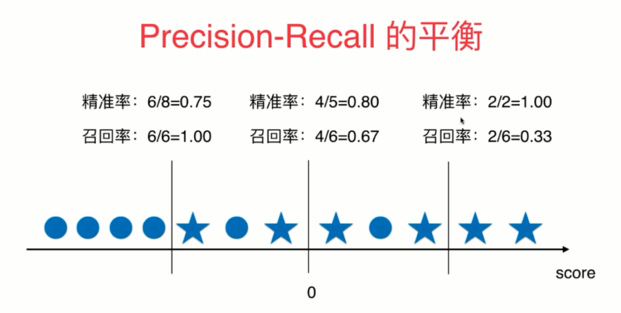

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

c:\users\administrator\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

# 调整阈值

In [9]:
log_reg.decision_function(X_test)

array([-22.05698719, -33.02937778, -16.21333279, -80.37915403,
       -48.25127619, -24.54005982, -44.39172138, -25.0429207 ,
        -0.9782989 , -19.71745295, -66.25140755, -51.09598495,
       -31.49347281, -46.05338566, -38.67871522, -29.80471852,
       -37.58846077, -82.57567705, -37.81904826, -11.01164092,
        -9.17441372, -85.13003467, -16.71617119, -46.23719791,
        -5.32990531, -47.91764603, -11.66730361, -39.19597521,
       -25.25293221, -14.36647475, -16.99783205, -28.91903643,
       -34.33938873, -29.47600607,  -7.85812285,  -3.82096759,
       -24.08156831, -22.16363823, -33.61213303, -23.14019349,
       -26.91802392, -62.38935133, -38.85685226, -66.77256753,
       -20.14480026, -17.47885964, -18.06799243, -22.222244  ,
       -29.6230333 , -19.73173447,   1.49552314,   8.32079437,
       -36.29302611, -42.5073014 , -25.90460571, -34.98959528,
        -8.42008995, -50.04727283, -51.48207237,  19.88956557,
        -8.91885667, -31.99340731, -11.66095306,  -0.47

In [10]:
log_reg.decision_function(X_test)[:10]

array([-22.05698719, -33.02937778, -16.21333279, -80.37915403,
       -48.25127619, -24.54005982, -44.39172138, -25.0429207 ,
        -0.9782989 , -19.71745295])

In [11]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
decision_scores = log_reg.decision_function(X_test)

In [13]:
np.min(decision_scores)

-85.68605733401593

In [14]:
np.max(decision_scores)

19.88956556899649

In [15]:
y_predict_2 = np.array(decision_scores >= 5,dtype="int")

In [16]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict_2)

0.96

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict_2)

0.5333333333333333

In [19]:
y_predict_3 = np.array(decision_scores >= -5,dtype="int")

In [20]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [21]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [22]:
recall_score(y_test, y_predict_3)

0.8888888888888888